IMPORTS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

FIRST LOOK AT THE DATASET

In [2]:
data=pd.read_csv("tips (data for regression problem).csv")
print(data)

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


In [3]:
print(data.shape)
print(data.columns)

(244, 7)
Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')


In [4]:
print(data.info())
data.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB
None


,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244,244,244,244,244.000000
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.785943,2.998279,NaN,NaN,NaN,NaN,2.569672
std,8.902412,1.383638,NaN,NaN,NaN,NaN,0.951100
min,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,13.347500,2.000000,NaN,NaN,NaN,NaN,2.000000
50%,17.795000,2.900000,NaN,NaN,NaN,NaN,2.000000
75%,24.127500,3.562500,NaN,NaN,NaN,NaN,3.000000


In [5]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])
print("Pair wise correlation:")
print(numeric_data.corr())
print("Pair wise covaraince:")
print(numeric_data.cov())

Pair wise correlation:
            total_bill       tip      size
total_bill    1.000000  0.675734  0.598315
tip           0.675734  1.000000  0.489299
size          0.598315  0.489299  1.000000
Pair wise covaraince:
            total_bill       tip      size
total_bill   79.252939  8.323502  5.065983
tip           8.323502  1.914455  0.643906
size          5.065983  0.643906  0.904591


NULL HANDLING

In [6]:
data.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

Due to the absence of null values null handling is not required.

GRAPHS TO BETTER UNDERSTAND DATASET

Let’s start with taking a look at boxplots to better understand the relations between categorical variables in our dataset and the tip.

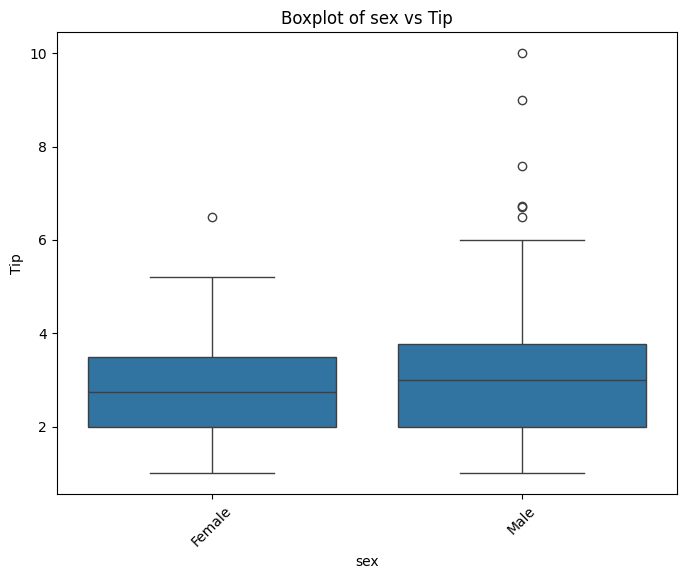

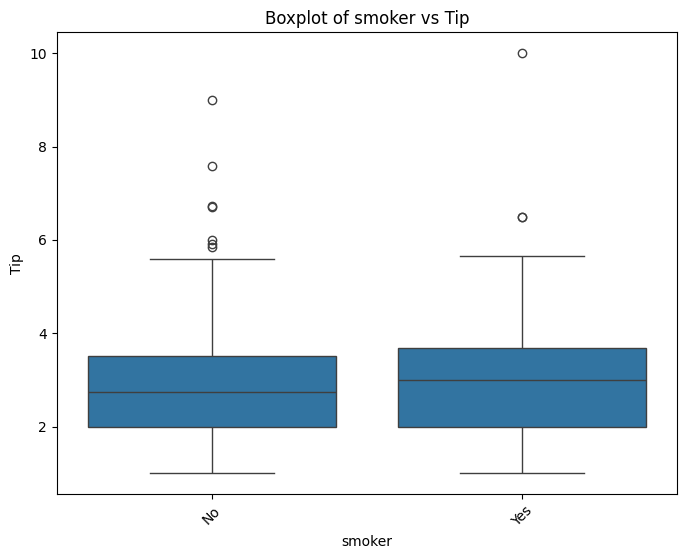

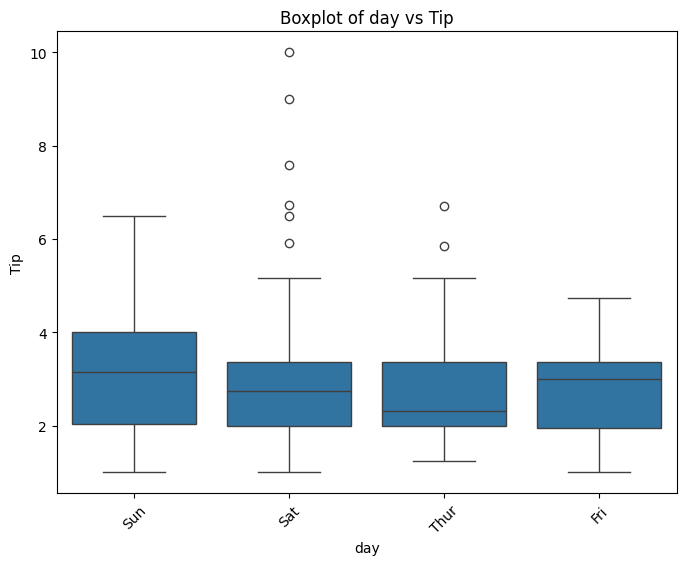

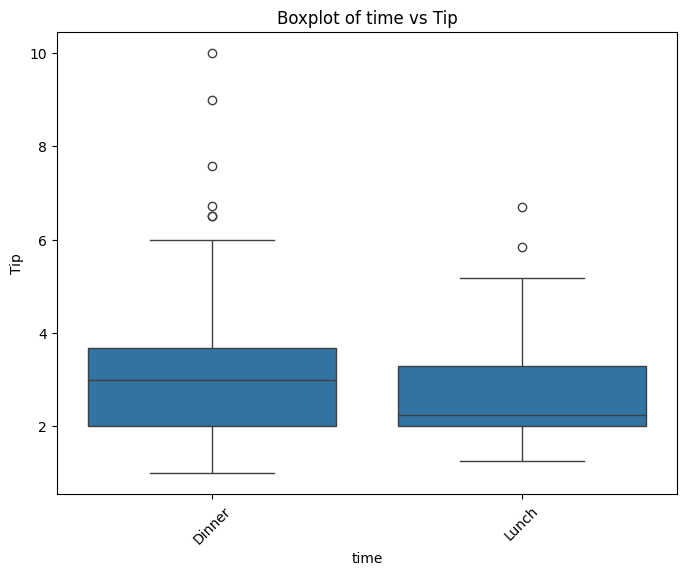

In [7]:
for column in data.columns:
    if data[column].dtype == 'object':
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=data[column], y=data['tip'])
        plt.title(f'Boxplot of {column} vs Tip')
        plt.xlabel(column)
        plt.ylabel('Tip')
        plt.xticks(rotation=45)
        plt.show()


CONCLUSIONS:<br>
1.The median tipping amount is higher for males as compared to females, not only that males have more outliers implying that males tend to tip better.<br>
2.Minor differences are seen, but the median ti amount is greater for a smoker than a non-smoker. However, non-smokers had a higher frequency of tipping generously enough to be considered outliers.<br>
3.While minimum tips seem to be unaffected, relatively higher tips were given on Sundays, whereas tips over 7 dollars were only seen on Saturdays, implying that restaurants tend to do better on weekends.<br>
4.Better tips were given on lunch than on dinners.

Let's take a look at exactly how day and time effect the tip amount

<Axes: xlabel='day', ylabel='tip'>

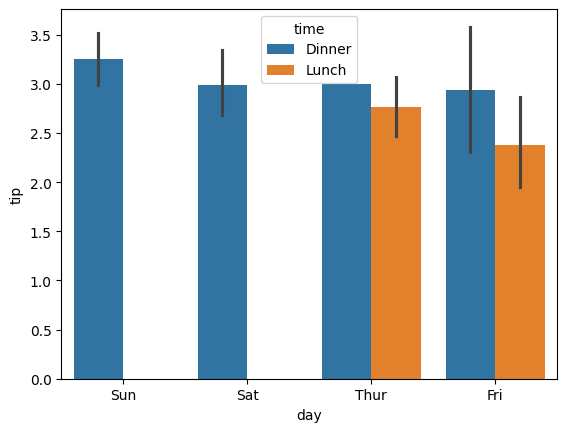

In [8]:
sns.barplot(data=data,x='day', y='tip',hue='time')

Now let's take a look at how size and total bill being the only two other numerical attributes affect tips.

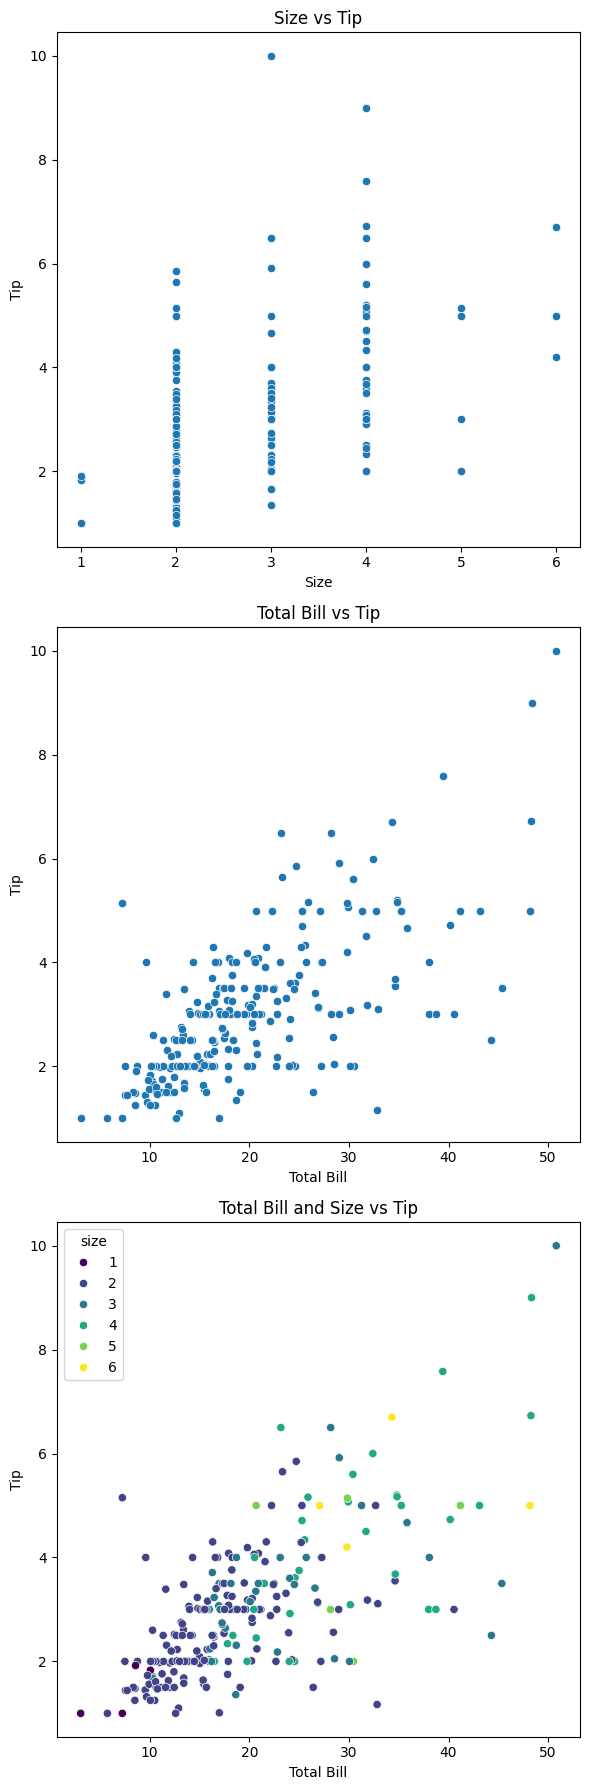

In [9]:
plt.figure(figsize=(6,18))
#first plot
plt.subplot(3,1, 1)
sns.scatterplot(x=data['size'], y=data['tip'])
plt.title('Size vs Tip')
plt.xlabel('Size')
plt.ylabel('Tip')
#second plot
plt.subplot(3, 1, 2)
sns.scatterplot(x=data['total_bill'], y=data['tip'])
plt.title('Total Bill vs Tip')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
#third plot
plt.subplot(3, 1, 3)
sns.scatterplot(x=data['total_bill'], y=data['tip'], hue=data['size'], palette='viridis')
plt.title('Total Bill and Size vs Tip')
plt.xlabel('Total Bill')
plt.ylabel('Tip')

plt.tight_layout()
plt.show()


In [10]:
X=data.drop('tip',axis=1)
y=data['tip']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
le = LabelEncoder()
categorical_columns = ['sex', 'smoker', 'day', 'time']

for column in categorical_columns:
    X_train[f'{column}'] = le.fit_transform(X_train[column])
    X_test[f'{column}'] = le.fit_transform(X_test[column])
scaler = StandardScaler()
X_train_usc=X_train
X_test_usc=X_test
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)
X_train = pd.DataFrame(X_train_sc,columns=X_train.columns)
X_test = pd.DataFrame(X_test_sc,columns=X_test.columns)

Label encoding will function the same as one-hot encoding and converting to an integer 
for sex, time and smoker since they only have one uniue value each.

In [13]:
X_train.head()

,total_bill,sex,smoker,day,time,size
0,-0.793062,0.731733,-0.790569,-0.761676,-0.610933,-0.612141
1,0.463227,0.731733,1.264911,-0.761676,-0.610933,-0.612141
2,0.807307,0.731733,1.264911,-1.837957,-0.610933,-0.612141
3,1.313709,0.731733,-0.790569,0.314605,-0.610933,1.519421
4,-0.484419,0.731733,-0.790569,1.390886,1.636840,-0.612141


 LET'S TRAIN MODELS

To make it easier and the code more modular we can use a loop instead of going individually. We will seperate the feature_importances to check the contribution of each feature in decision tree and random forest.


 The results of Linear Regression are:
MSE: 0.69481
RMSE: 0.83355
MAE: 0.67038
R2 Score: 0.44414

 The results of Ridge Regression are:
MSE: 0.69380
RMSE: 0.83294
MAE: 0.67002
R2 Score: 0.44495

 The results of Lasso Regression are:
MSE: 0.61221
RMSE: 0.78244
MAE: 0.65481
R2 Score: 0.51022

 The results of Decision Tree are:
MSE: 0.87742
RMSE: 0.93670
MAE: 0.71895
R2 Score: 0.29805
Feature importance


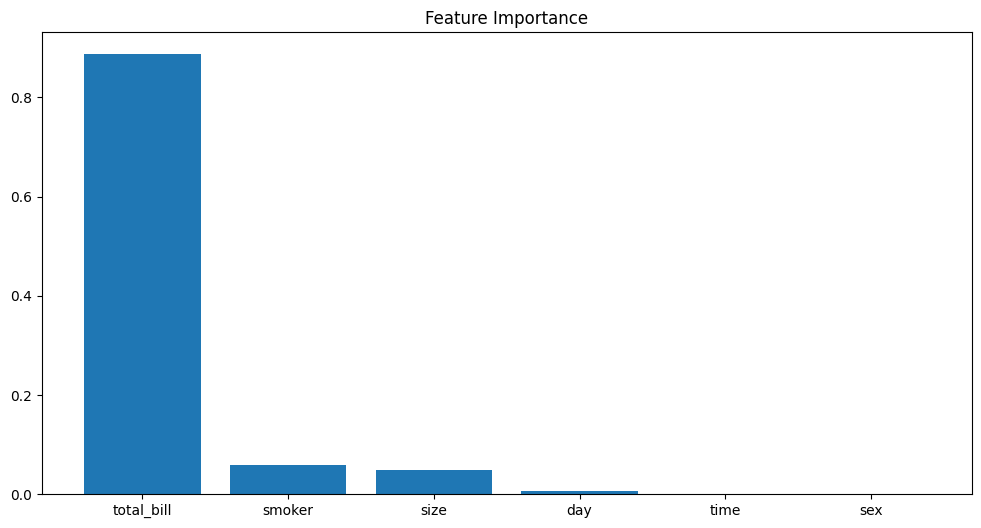


 The results of Random Forest are:
MSE: 0.90552
RMSE: 0.95159
MAE: 0.75273
R2 Score: 0.27557
Feature importance


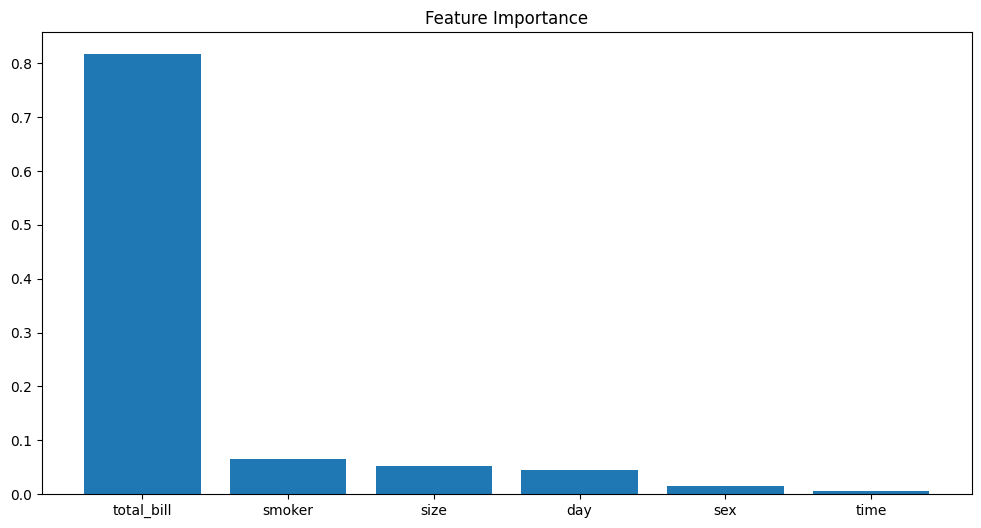


 The results of SVR are:
MSE: 0.71765
RMSE: 0.84714
MAE: 0.66223
R2 Score: 0.42587

 The results of KNN are:
MSE: 0.80942
RMSE: 0.89968
MAE: 0.74857
R2 Score: 0.35245


In [14]:
 models = {
        'Linear Regression': LinearRegression(),
        'Ridge Regression': Ridge(alpha=1.0),
        'Lasso Regression': Lasso(alpha=0.1),
        'Decision Tree': DecisionTreeRegressor(max_depth=5,random_state=42),
        'Random Forest': RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42),
        'SVR': SVR(kernel='rbf'),
        'KNN': KNeighborsRegressor(n_neighbors=5)
    }
metrics={}
r_res={}

for model_name, model in models.items():
   model.fit(X_train, y_train)
   y_pred = model.predict(X_test)
   mse = mean_squared_error(y_test, y_pred)
   rmse = np.sqrt(mse)
   mae = mean_absolute_error(y_test, y_pred)
   r2 = r2_score(y_test, y_pred)
   metrics[model_name] = {
            'MSE': mse,
            'RMSE': rmse,
            'MAE': mae,
            'R2': r2,
            'Model': model
        }
   print(f"\n The results of {model_name} are:")
   print(f"MSE: {mse:.5f}")
   print(f"RMSE: {rmse:.5f}")
   print(f"MAE: {mae:.5f}")
   print(f"R2 Score: {r2:.5f}")
   if model_name=="Random Forest" or model_name=="Decision Tree":
       feature_im=model.feature_importances_
       feats =X_train.columns
       ind = np.argsort(feature_im)[::-1]
       plt.figure(figsize=(12, 6))
       plt.title("Feature Importance")
       plt.bar(range(len(feats)), feature_im[ind], align="center")
       plt.xticks(range(len(feats)), feats[ind])
       print("Feature importance")
       plt.show()
   if "Regression" in model_name:
        r_res[model_name]=y_pred
        
   

We can also utilise mutual info regression provided by scikit learn.

In [15]:
from sklearn.feature_selection import mutual_info_regression
scores = mutual_info_regression(X_train, y_train)
df = pd.DataFrame({'Feature': X_train.columns, 'Mutual Info':scores})
df = df.sort_values(by='Mutual Info', ascending=False)
print(df)

      Feature  Mutual Info
0  total_bill     0.334625
5        size     0.073676
4        time     0.011154
1         sex     0.004190
2      smoker     0.000000
3         day     0.000000


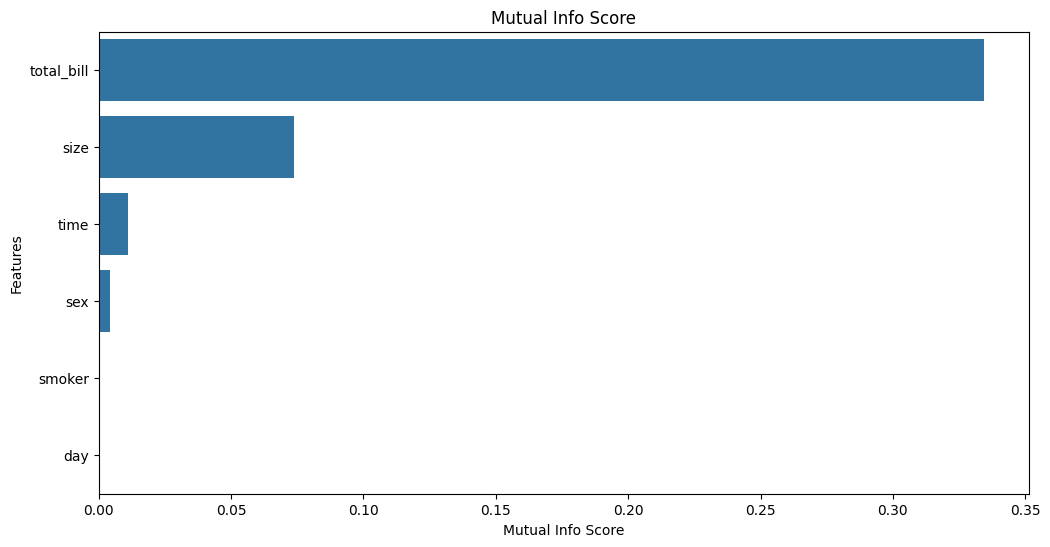

In [16]:
plt.figure(figsize=(12, 6))
sns.barplot(x="Mutual Info", y="Feature", data=df)
plt.title("Mutual Info Score")
plt.xlabel("Mutual Info Score")
plt.ylabel("Features")
plt.show()

This confirms the result that proves the importance of total bill in deciding tip amounts. Size also seems to play an important role consistently.

In [17]:
numerical_columns = data.select_dtypes(include=['number']).columns

In [18]:
print(numerical_columns)

Index(['total_bill', 'tip', 'size'], dtype='object')


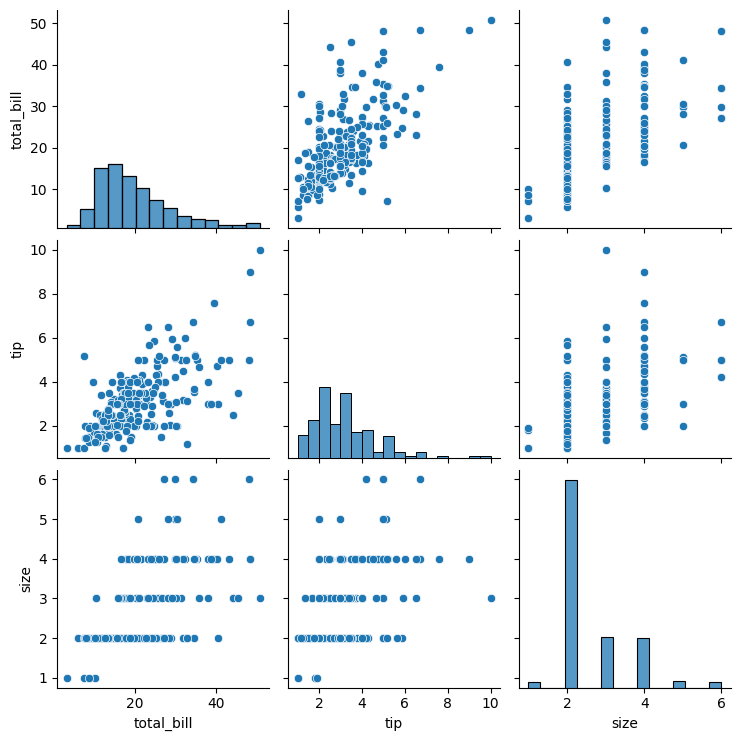

In [19]:
sns.pairplot(data[numerical_columns])
plt.show()

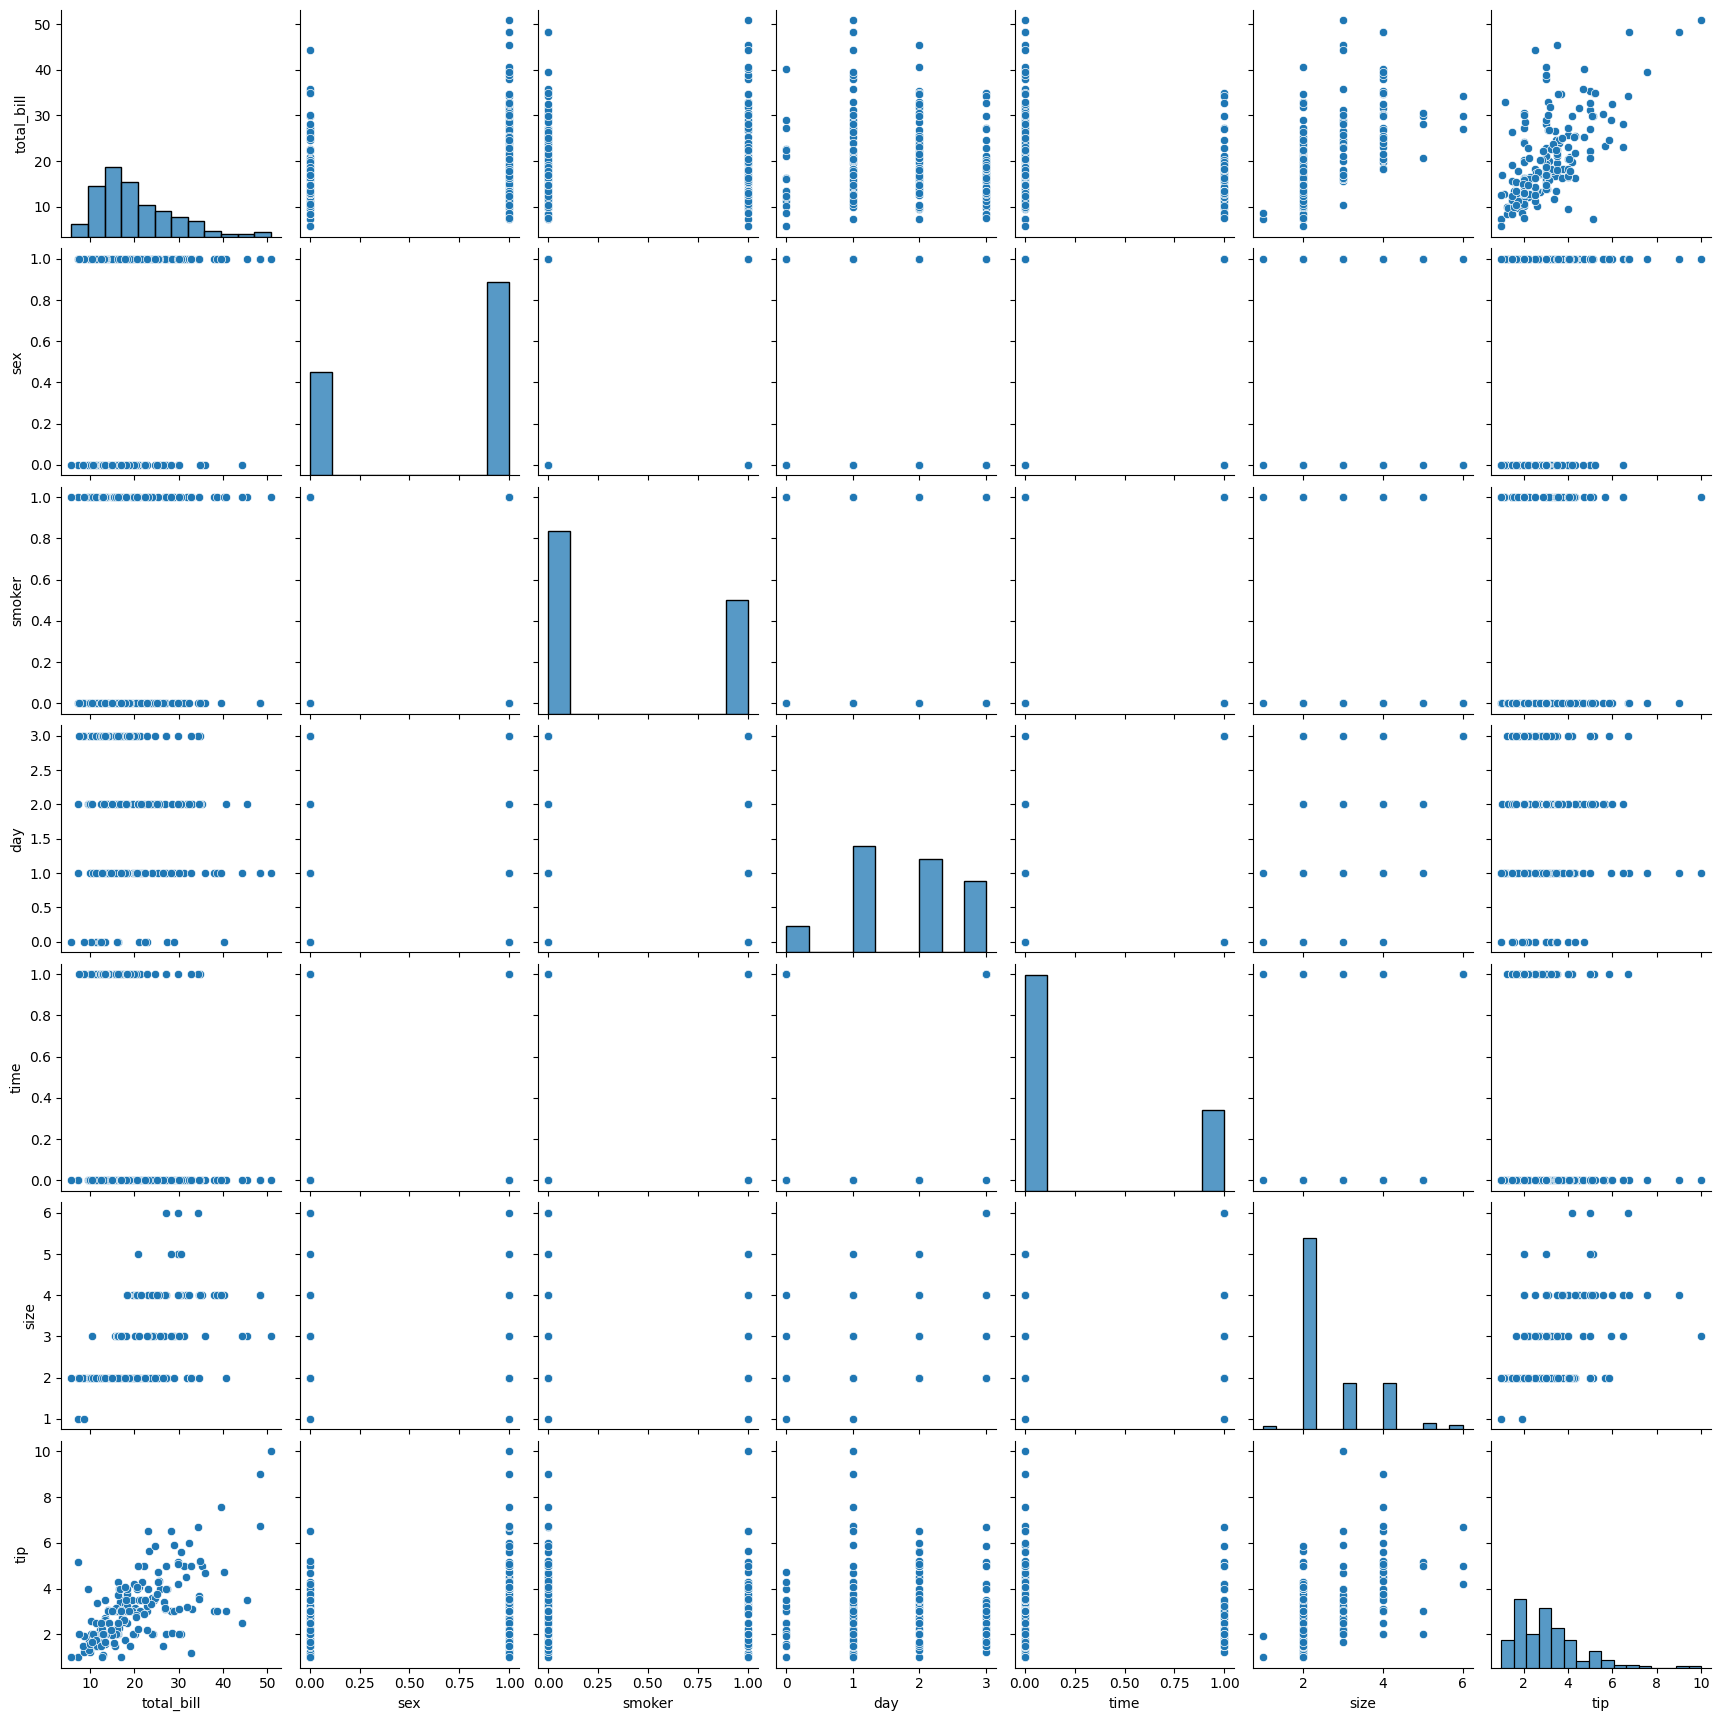

In [20]:
td=X_train_usc.copy()
td['tip']=y_train
sns.pairplot(td)
plt.show()
#Since all attributes are converted to numerical we can see their pair plots here


Correlation Heatmap

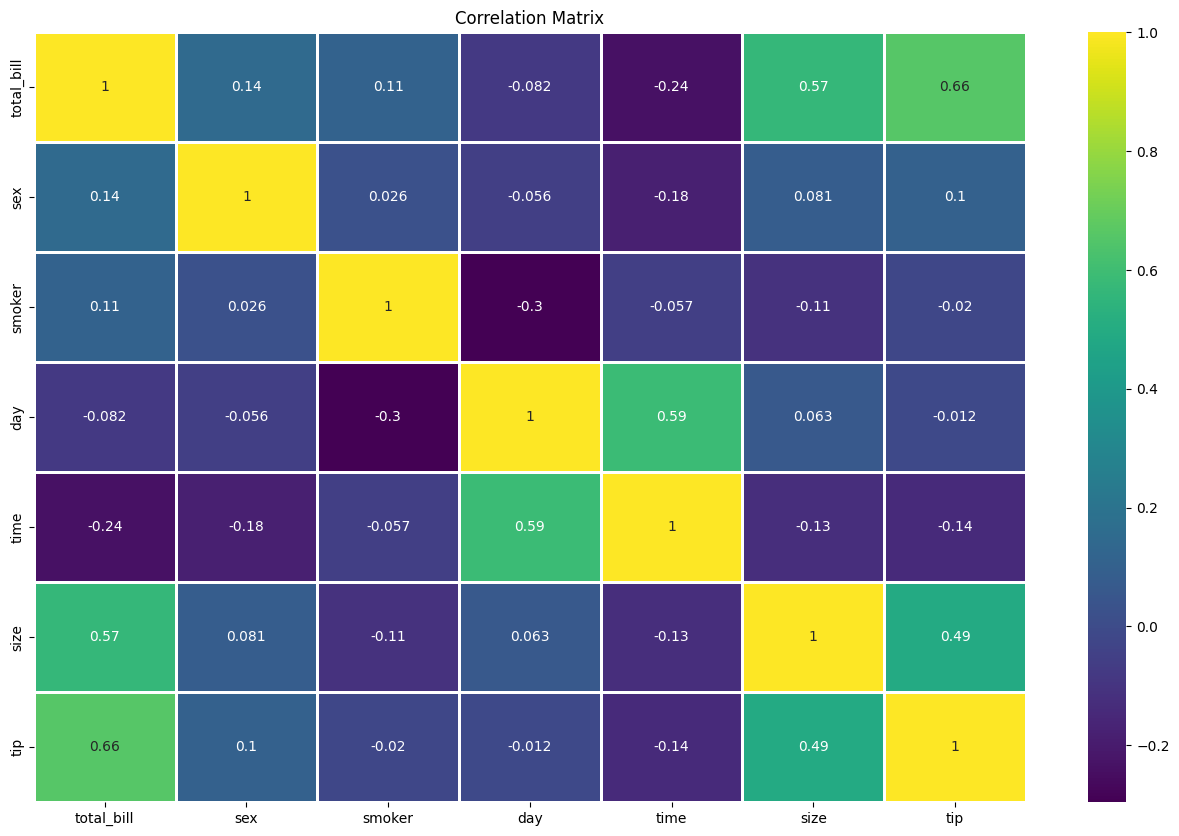

In [21]:
plt.figure(figsize=(16, 10))
c_matrix = td.corr()
sns.heatmap(c_matrix, annot=True, linewidths=0.8,cmap='viridis')
plt.title('Correlation Matrix')
plt.show()

Rainbow test

In [22]:
print(X_train.shape)
y_train.shape

(195, 6)


(195,)

In [23]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import linear_rainbow
X_const = sm.add_constant(data[["size","total_bill"]])
model = sm.OLS(data['tip'], X_const)
res=model.fit()
rainbow_stat, rainbow_p_value = linear_rainbow(res)
print(f'Rainbow test statistic: {rainbow_stat}, p-value: {rainbow_p_value}')
if rainbow_p_value > 0.05:
    print("Null hypothesis not rejected. The data may follow a linear trend.")
else:

    print("Null hypothesis rejected(p-value <= 0.05).The data may not follow a linear trend.")

Rainbow test statistic: 1.1902656646832812, p-value: 0.17048935693447625
Null hypothesis not rejected. The data may follow a linear trend.


Residual Plots

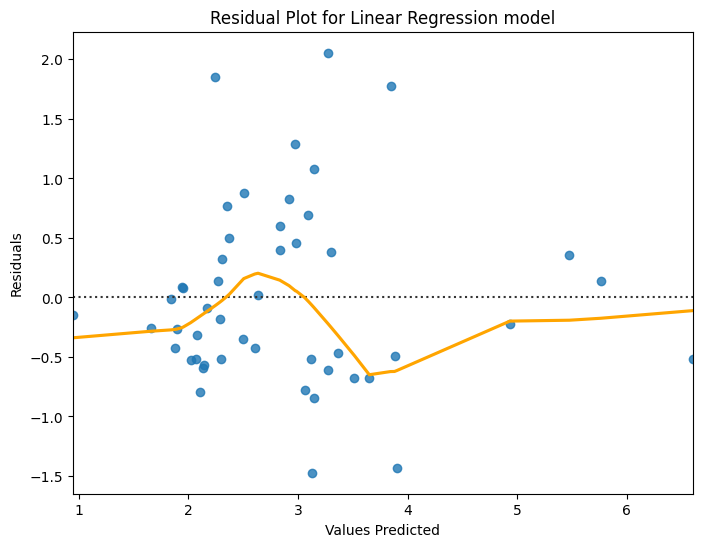

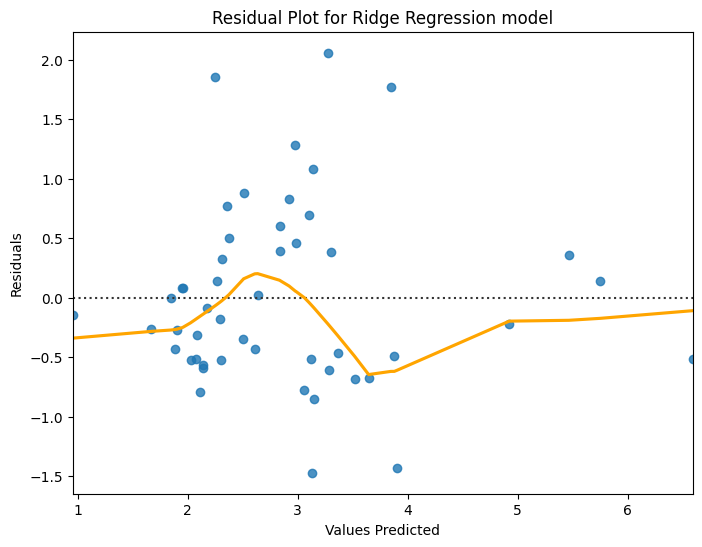

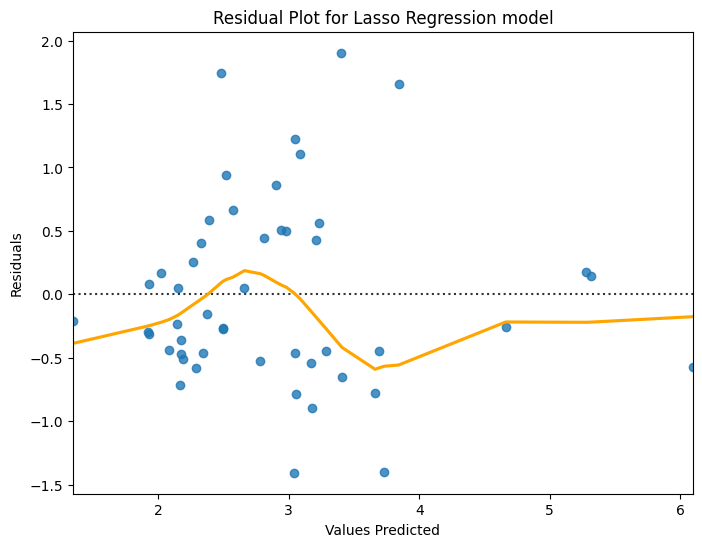

In [24]:
for model in r_res:
    plt.figure(figsize=(8,6))
    sns.residplot(x=r_res[model],y=y_test-r_res[model],lowess=True,line_kws={"color":"orange"})
    plt.title(f"Residual Plot for {model} model")
    plt.xlabel("Values Predicted")
    plt.ylabel("Residuals")
    plt.show()
    
    

Actionable Insights:<br>
Management may try increasing the overall bill amount through various strategies such as suggesting combos, and providing deals for bigger orders since total bill plays the most significant role in deciding tips. They may also try to make the place more friendly for larger gatherings as that would increase both size and total bill.